## Import Libraries

In [72]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dtale
plt.rcParams['font.family'] = 'Arial'  # Use a commonly available font


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline

## Load the Data

In [32]:
#read data from file 
df = pd.read_csv("final_data.csv")

In [33]:
#show data shape 
df.shape

(10754, 22)

In [34]:
# show columns
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [79]:
# using dtale for a better view of data 
d = dtale.show(df)
d.open_browser()

In [4]:
#seeing the first rows in df
df.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [36]:
# uniqeness
# no duplicates were found
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger


In [35]:
# Completeness
# no missing data was found
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [49]:
# A column for displaying a link; it’s not important
df.drop(columns=['player'], inplace=True)

In [50]:
df.columns

Index(['team', 'name', 'position', 'height', 'age', 'appearance', 'goals',
       'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [39]:
#"After dropping the player columns, it appears only winger needed to be changed to boolean."
df['winger'] = df['winger'].astype(bool)

In [51]:
# Accurecy types
df.dtypes

team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                    bool
dtype: object

In [52]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding
categorical_features = ['team', 'name','position', "winger"]
numeric_features = ['height','age','appearance','goals','assists','yellow cards','second yellow cards','red cards','goals conceded','clean sheets','minutes played','days_injured','games_injured','award','current_value','highest_value','position_encoded']

In [53]:
for i in categorical_features:
    print (df[i].value_counts())

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64
name
Paulinho              6
Vitinho               5
Guilherme             5
Fernando              4
João Pedro            4
                     ..
Everson               1
Matheus Mendes        1
Gabriel Delfim        1
Nathan Silva          1
Alexander Badolato    1
Name: count, Length: 10584, dtype: int64
position
Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Att

In [24]:
#df = df[df['age']>=40]

In [54]:
# Calculate the frequency of each 'Type'
type_counts = df['team'].value_counts()
type_counts
# Filter 'Type' values that appear 10 or more times
#df = df[df['team'].isin(type_counts[type_counts >= 2].index)]

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64

In [55]:
df.shape

(10754, 21)

In [56]:
# Calculate the frequency of each 'position'
position_counts = df['position'].value_counts()
position_counts
# # Filter 'Type' values that appear 10 or more times
# df = df[df['Make'].isin(make_counts[make_counts >=2].index)]

position
Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: count, dtype: int64

In [14]:
df.shape

(5364, 11)

2024-10-29 02:55:38,051 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-10-29 02:55:38,052 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-10-29 02:55:38,054 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-10-29 02:55:38,060 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-10-29 02:55:38,060 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-10-29 02:55:38,060 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-10-29 02:55:38,060 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-10-29 02:55:38,060 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-10-29 02:55:38,068 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-10-29 02:55:38,069 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-10-29 02:55:38,070 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-10-29 02:55:38,072 - WARNING  - findfont: Font family 'Heiti TC' not found.
2024-10-29 02:55:38,074 - WA

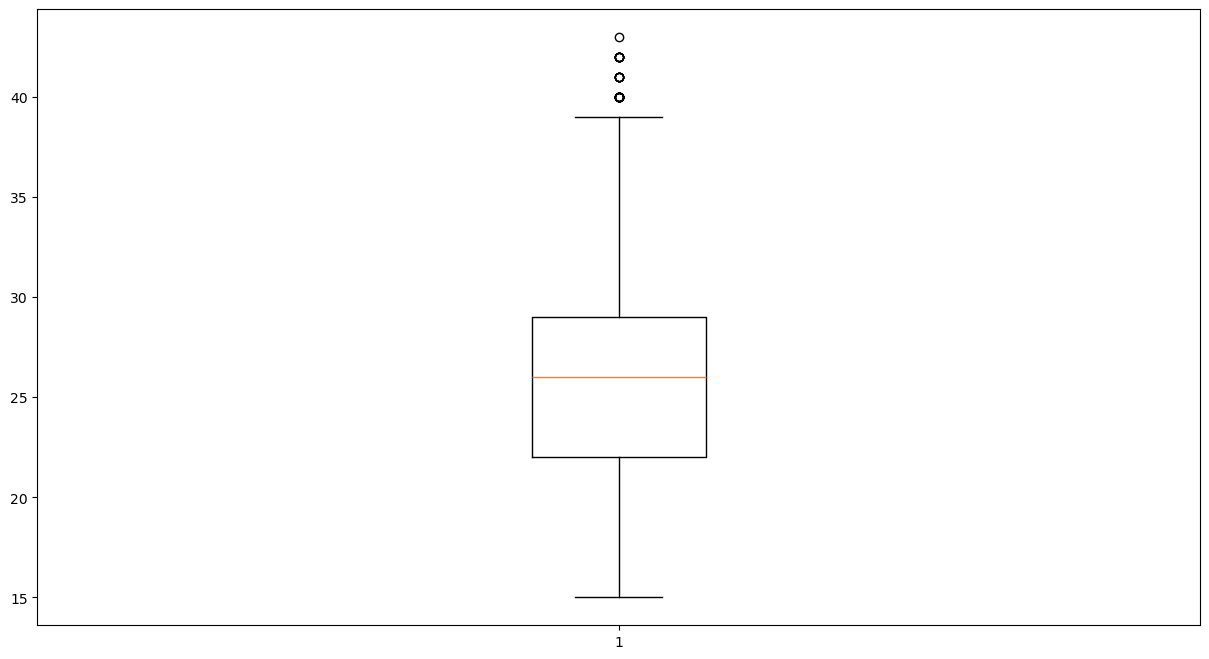

In [63]:
plt.figure(figsize=(15,8))
plt.boxplot(df['age']);
#plt.hist(df[(df['age']<=350000) & (df['Price']>5000)]['Price'], bins=100);
#plt.hist(df[(df['Price']<=400000) & (df['Price']>=5000)]['Price'], bins=100);

In [17]:
#df = df[(df['Price']<=350000) & (df['Price']>=5000)]

In [18]:
df.shape

(3566, 11)

In [85]:
df = df[df['appearance']>=0]
df.shape

(385, 21)

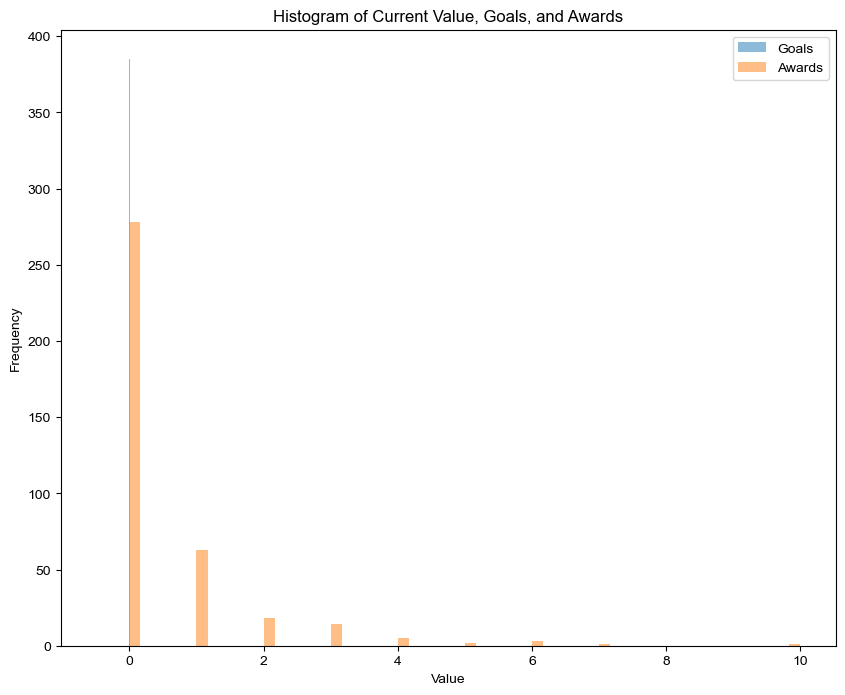

In [88]:
#plt.figure(figsize=(10,8))
#plt.boxplot(df['Mileage']);
#plt.hist(df[df['award']<=60]['award'], bins=60);
#plt.hist(df['Mileage'], bins=100);

plt.figure(figsize=(10, 8))

# Create a histogram for current_value
#plt.hist(df['age'], bins=60, alpha=0.5, label='age')

# Create a histogram for goals
plt.hist(df['goals'], bins=60, alpha=0.5, label='Goals')

# Create a histogram for awards
plt.hist(df['award'], bins=60, alpha=0.5, label='Awards')

# Adding titles and labels
plt.title('Histogram of Current Value, Goals, and Awards')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [86]:
df = df[df['age']<=38]
df.shape

(385, 21)

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [89]:
df.head(2)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
322,AFC Bournemouth,Darren Randolph,Goalkeeper,187.0,36.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,103,18,1,500000,4500000,1,False
349,Brentford FC,Matthew Cox,Goalkeeper,183.0,20.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,500000,500000,1,False


In [90]:
categorical_features

['team', 'name', 'position', 'winger']

In [91]:
# one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [92]:
df.shape

(385, 567)

In [93]:
df.head(2)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,position_Defender Right-Back,position_Goalkeeper,position_midfield,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield,winger_False,winger_True
322,187.0,36.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,False,True,False
349,183.0,20.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,False,False,False,True,False


#### 3. Feature selection

In [27]:
# sns.heatmap(df.corr(), annot=True);

In [99]:
correlation = df.corr()
print(correlation['age'].sort_values(ascending=False))

age                    1.000000
award                  0.415686
position_Goalkeeper    0.404845
highest_value          0.319422
days_injured           0.299403
                         ...   
assists                     NaN
second yellow cards         NaN
goals conceded              NaN
clean sheets                NaN
minutes played              NaN
Name: age, Length: 567, dtype: float64


In [100]:
# Set the correlation threshold
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['age']) > threshold]['age'].index
selected_features

Index(['height', 'age', 'days_injured', 'games_injured', 'award',
       'highest_value', 'position_encoded', 'position_Goalkeeper'],
      dtype='object')

In [30]:
selected_features = [
    'age',                # Potentially affects value due to experience
    'appearance',         # Indicates participation level
    'goals',              # Direct contribution to team performance
    'assists',            # Indicates playmaking ability
    'yellow cards',       # Could indicate discipline issues affecting value
    'red cards',          # Directly impacts a player's availability and value
    'height',             # May affect playing style and position
    'current_value',      # Target variable to predict
    'highest_value',      # Historical value could provide insights
    'position_encoded',    # Position can significantly impact player value
    'winger'             # Specific roles can also affect market value
]


In [101]:
df = df[selected_features]
df.head()

,height,age,days_injured,games_injured,award,highest_value,position_encoded,position_Goalkeeper
322,187.0,36.0,103,18,1,4500000,1,True
349,183.0,20.0,0,0,0,500000,1,True
565,187.0,27.0,132,24,3,100000,1,True
620,189.0,29.0,134,22,2,800000,1,True
770,192.0,38.0,415,45,2,2500000,1,True


#### 4. Prepare train and test data

In [104]:
# Prepare data
X = df.drop(['age'], axis=1)
y = df['age']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
X.shape

(385, 7)

## Buliding the Model

In [105]:
model = LinearRegression()

In [106]:
ridge_model = Ridge()  # You can adjust alpha to see different resu

In [107]:
lasso_model = Lasso()  # You can adjust alpha to see different results

In [120]:
param_grid = {
    'alpha': [0, 0.0000003, 0.0002, 0.001, 0.01, 0.5, 1, 5]  # Regularization strength
}
grid_search = GridSearchCV(estimator=ridge_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

## Train the Model

In [119]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

## Test the Model

In [118]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Interpretation of the Model

In [117]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
height,0.282167
days_injured,0.913694
games_injured,-0.043844
award,1.322440
highest_value,0.473656
position_encoded,-0.126320
position_Goalkeeper,1.539417


In [116]:
print(model.intercept_) 

23.5332838312987


In [115]:
coeff_df = pd.DataFrame(lasso_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

AttributeError: 'Lasso' object has no attribute 'coef_'

## Evaluating the Model 

1. Mean Square Error

In [121]:
y_base = [y_train.mean()] * len(y_test)

In [122]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 24.499329720850923


In [123]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 15.09954564269971
Mean Squared Error for testing: 17.482350935766693


2. Mean Absolute Error

In [126]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 4.010063508559623


In [127]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 3.0146307105076073
Mean Absolute Error for testing: 3.308847529989825


3. Root Mean Squared Error

In [128]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 2.002514296717909


In [129]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 3.885813382382086
Root Mean Squared Error for testing: 4.181190133893303


4. R Square

In [130]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.3576371108799854
R Square for testing: 0.27678519926678713


#### Predictions vs. Real Values

In [131]:
predictions = model.predict(X_test_scaled)
#predictions

In [132]:
Real_Values = np.array(y_test)
#Real_Values

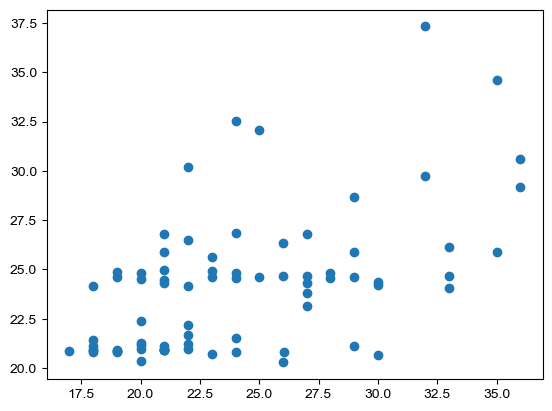

In [133]:
plt.scatter(Real_Values,predictions); 

#### Residual Histogram

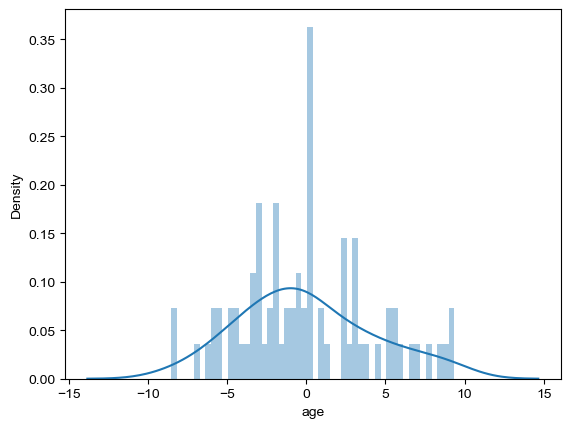

In [134]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution